<a href="https://colab.research.google.com/github/CrazyCoder009/DeepLearning-Training/blob/master/D101/Keras_Digitrecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade tensorflow
!pip install numpy
!pip install matplotlib

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 images of handwritten digits from 0-9

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2632 - accuracy: 0.9226
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1099 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9768


In [4]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9687
0.09921577572822571 0.9686999917030334


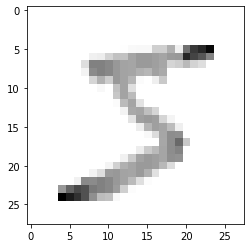

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [6]:
model.save('epic_num_reader.model') #Saving MOdel

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [7]:
new_model = tf.keras.models.load_model('epic_num_reader.model') #Make sure to run the pyplot and keras model first

In [8]:
predictions=new_model.predict([x_test])

In [9]:
print(predictions)

[[1.3931962e-09 2.5861429e-08 1.1100429e-06 ... 9.9992859e-01
  2.4500676e-07 1.6838435e-06]
 [5.4597571e-09 1.0815450e-03 9.9883348e-01 ... 3.5091464e-08
  2.0705161e-07 3.7740408e-11]
 [1.5887319e-07 9.9961901e-01 3.4704768e-05 ... 2.6181061e-04
  3.1002237e-05 1.2207478e-07]
 ...
 [3.7242112e-09 1.9614644e-07 1.5548708e-09 ... 1.6185069e-05
  1.7229434e-06 1.1323276e-04]
 [6.9343905e-08 1.1371949e-07 2.2932445e-08 ... 1.3445603e-07
  5.3745526e-04 4.4979608e-08]
 [9.8010688e-08 1.7732910e-09 5.3206747e-08 ... 7.6608393e-11
  7.7838813e-08 1.0941820e-09]]


In [10]:
import numpy as np 
print(np.argmax(predictions[3]))

0


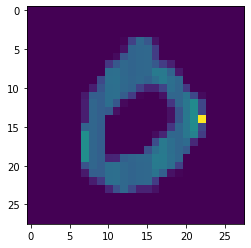

In [11]:
plt.imshow(x_test[3])
plt.show()